['151008-v1', '151012.2-v1', '151116-v1', '161202-v1', '161217-v1', '170208-v1', '170219-v1', '170405-v1', '170412-v1', '170423-v1', '170616-v1', '170630-v1', '170705-v1', '170720-v1', '190924_232654-v1', '191118_212859-v1', '191223_014159-v1', '191225_215715-v1', '200114_020818-v1', '200201_203549-v1', '200214_224526-v1', '200214_224526-v2', '200219_201407-v1', '200311_103121-v1', 'GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW150914-v4', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151012-v4', 'GW151226-v1', 'GW151226-v2', 'GW151226-v3', 'GW170104-v1', 'GW170104-v2', 'GW170104-v3', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170608-v4', 'GW170729-v1', 'GW170729-v2', 'GW170809-v1', 'GW170809-v2', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170814-v4', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170818-v2', 'GW170823-v1', 'GW170823-v2', 'GW190403_051519-v1', 'GW190408_181802-v1', 'GW190408_181802-v2', 'GW190408_181802-v3', 'GW190412-v1', 'GW190412-v2', 'G

<Figure size 1200x600 with 0 Axes>

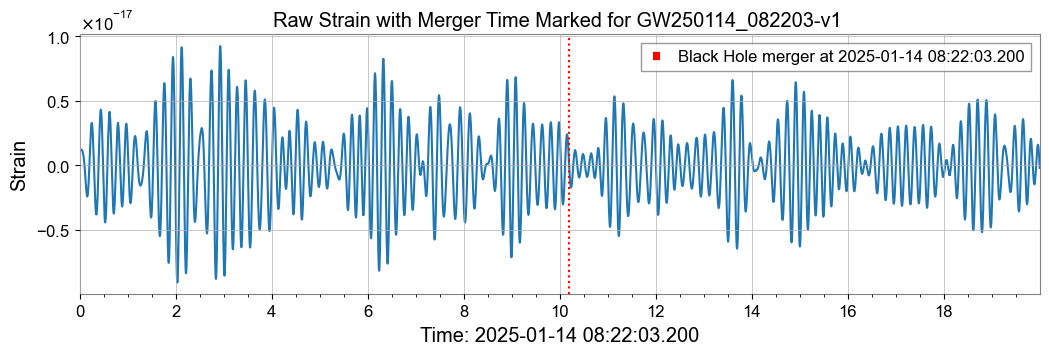

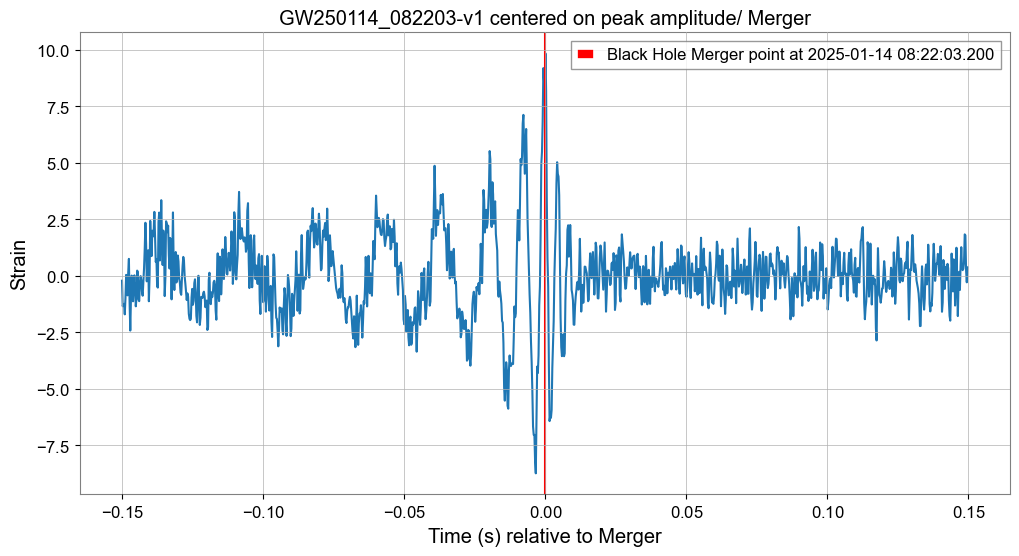

TypeError: unsupported operand type(s) for -: 'str' and 'float'

<Figure size 1200x600 with 0 Axes>

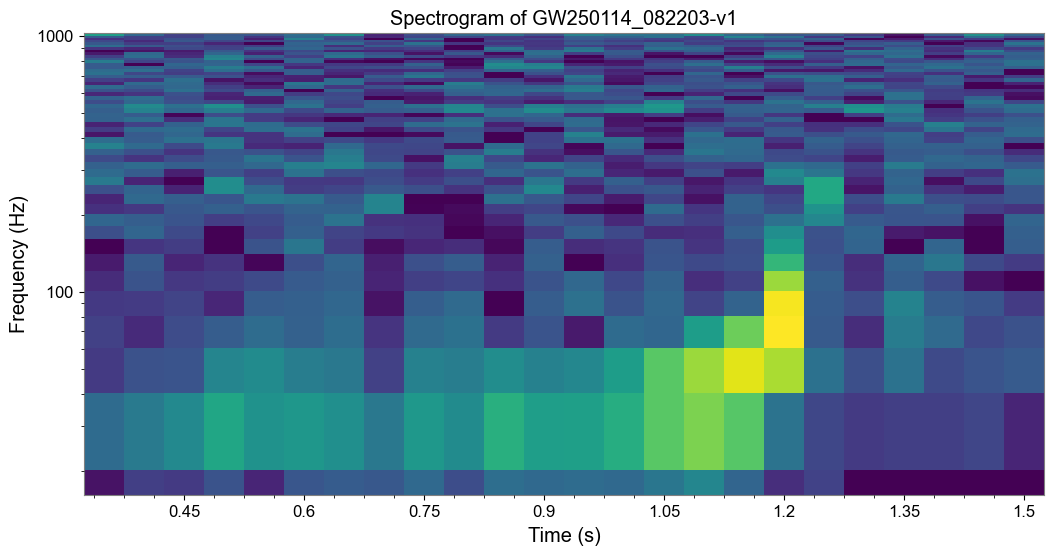

In [20]:
from gwosc import*
from gwosc.datasets import event_gps
from gwosc.locate import get_event_urls
from gwpy.timeseries import TimeSeries
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np
from astropy.utils.data import get_pkg_data_filename

event = "GW250114_082203-v1"  
window = 0.3         
print(datasets.find_datasets(type= "event", detector="L1"))

gps = event_gps(event)
data = TimeSeries.fetch_open_data("L1", int(gps)-10, int(gps)+10)
merger_utc = Time(gps, format='gps').utc.iso
# Bandpass & whiten
bp = data.bandpass(40, 350).notch(60).notch(120).notch(180).notch(240)
white = bp.whiten(4, 2)

# Zoom in a short range to find peak
zoom = white.crop(gps-0.5, gps+0.5)
peak_index = np.argmax(zoom.value)
peak_time = zoom.times.value[peak_index]
peak_value = zoom.value[peak_index]

# Crop to fixed window around peak and center times at 0
start = peak_time - window/2
end   = peak_time + window/2
zoom_window = white.crop(start, end)
times_centered = zoom_window.times.value - peak_time

# Offset strain values so peak amplitude is at 0
strain_centered = zoom_window.value - np.mean(zoom_window.value)

plt.figure(figsize = (12,6))
Strain = data.plot()
plt.axvline(gps, color='r', linestyle=':', label=f"Black Hole merger at {merger_utc}")
plt.title(f"Raw Strain with Merger Time Marked for {event} ")
plt.xlabel(f"Time: {merger_utc}")
plt.ylabel("Strain")
plt.legend()
plt.show()

# --- Plot ---
plt.figure(figsize=(12,6))
plt.plot(times_centered, strain_centered)
plt.axvline(0, color='red', linestyle='-', label=f'Black Hole Merger point at {merger_utc}')
plt.xlabel("Time (s) relative to Merger")
plt.ylabel("Strain")
plt.title(f"{event} centered on peak amplitude/ Merger")
plt.legend()
plt.show()

zoom = white.crop(gps - 0.875, gps + 0.325)
spec = zoom.spectrogram(stride=0.05, fftlength=0.05, overlap=0.04)
plt.figure(figsize=(12, 6))
spec.plot(norm='log', vmin=1e-4, vmax=1e-1)
ax = plt.gca()
ax.set_yscale('log')
ax.set_ylim(16, 1024)
ax.set_title(f"Spectrogram of {event}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.grid(False)
merger_time_rel = merger_utc - (gps - 0.875)
ax.axvline(merger_time_rel, color='r', linestyle='-', label="Black Hole Merger")
ax.legend(True)
plt.show()

strain_norm = strain_centered / np.max(np.abs(strain_centered))  
num_points = len(strain_norm)
duration = times_centered[-1] - times_centered[0]
resample_factor = int(sampling_rate * duration / num_points)



